In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

## Opening Data

In [2]:
data = pd.read_csv('/Users/kloeyap/Documents/allbirds-data.csv')
data.head()

,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,CLICKSTREAM_EVENTS_TOTAL.1,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,...,PRICE_INFORMATION,AVG_REVIEW_SCORE,STYLE,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP
0,6c80a69aee886436e29279ea32a8e01c8d6bd9245f06e4...,United States,M,763,763,2019-12-30T02:13:39Z,2021-11-30T06:48:50.362Z,2023-08-09T02:12:47.304Z,2023-06-23T00:17:33Z,product_viewed,...,89.0,3.960000,mens-tree-dashers-1,Tree Dasher,Pukeko (White),Footwear,Shoe,Mens,Dasher,Active
1,aa9eb022ab1bf8dd03f7a08d0bfc7cebee6bbddd20a338...,United States,NaN,341,341,2019-09-25T13:54:27Z,2021-09-14T11:41:14.862Z,2023-09-08T00:59:06.069Z,2022-12-03T18:38:07Z,product_viewed,...,125.0,4.268293,mens-wool-runner-mizzles,Wool Runner Mizzle,Ntrl Blck (Rggd Khk),Footwear,Shoe,Mens,Runner,Lifestyle
2,09c26d7b27b81279453efb2cc8a2743f694cafcdb6c188...,United States,M,126,126,2023-02-24T14:09:29Z,2023-02-10T16:07:07.678Z,2023-08-21T14:41:36.74Z,2023-03-18T15:46:02Z,product_viewed,...,99.0,4.800000,mens-trail-runners-swt,Trail Runner SWT,Mdm Gry (Rggd Khk),Footwear,Shoe,Mens,Trail,Active
3,9976c812700600d29fd5f72e47b0f503ea9f9007e68873...,United States,F,41,41,2023-06-01T15:25:38Z,2023-06-01T15:22:17.951Z,2023-06-01T15:26:07.661Z,2023-06-01T15:25:38Z,product_viewed,...,100.0,4.111111,womens-tree-breezers,Tree Breezer,Navy Night (Dark Navy),Footwear,Shoe,Womens,Breezer,Lifestyle
4,977a1dca605edc6c0e93790c1a4db477b46139cf3beca2...,NaN,NaN,14,14,NaN,2023-01-26T11:36:23.587Z,2023-01-26T11:45:18.987Z,NaN,product_viewed,...,49.0,4.812500,womens-natural-legging,Natural Legging,Shadow,Apparel,Bottom,Womens,Other Bottom,Essentials


#### Drop repeated column

In [3]:
data = data.drop(['CLICKSTREAM_EVENTS_TOTAL.1'], axis=1)

In [4]:
data.columns

Index(['USER_ID', 'COUNTRY', 'DERIVED_GENDER_BY_NAME',
       'CLICKSTREAM_EVENTS_TOTAL', 'FIRST_PURCHASE_AT', 'FIRST_VISIT_AT',
       'LATEST_VISIT_AT', 'LATEST_PURCHASE_AT', 'EVENT_NAME',
       'EVENT_TIMESTAMP', 'ITEM_ID', 'PRICE_INFORMATION', 'AVG_REVIEW_SCORE',
       'STYLE', 'TAXONOMY_STYLE', 'COLOR_NAME', 'PRODUCT_CLASS',
       'PRODUCT_SUBCLASS', 'TEAM', 'FRANCHISE', 'PRODUCT_GROUP'],
      dtype='object')

### Checking Outliers

In [5]:
max(data['PRICE_INFORMATION'])
data[data['PRICE_INFORMATION'] == 195000].head()

,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,EVENT_TIMESTAMP,...,PRICE_INFORMATION,AVG_REVIEW_SCORE,STYLE,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP
82838,90bf5a84b06460c65639b7133ba2e03f48a169506e7ee2...,South Korea,NaN,77,2023-07-20T01:40:22Z,2023-07-20T01:24:52.8Z,2023-07-20T01:40:39.699Z,2023-07-22T06:07:25Z,product_viewed,2023-07-20T01:29:01.222Z,...,195000.0,4.750000,womens-wool-runner-up-mizzles,Wool Runner-up Mizzle,Natural Grey,Footwear,Shoe,Womens,Runner,Lifestyle
93197,90bf5a84b06460c65639b7133ba2e03f48a169506e7ee2...,South Korea,NaN,77,2023-07-20T01:40:22Z,2023-07-20T01:24:52.8Z,2023-07-20T01:40:39.699Z,2023-07-22T06:07:25Z,product_viewed,2023-07-20T01:26:30.726Z,...,195000.0,4.619048,womens-wool-runner-up-mizzles,Wool Runner-up Mizzle,Ntrl Blck (Rggd Khk),Footwear,Shoe,Womens,Runner,Lifestyle
179305,90bf5a84b06460c65639b7133ba2e03f48a169506e7ee2...,South Korea,NaN,77,2023-07-20T01:40:22Z,2023-07-20T01:24:52.8Z,2023-07-20T01:40:39.699Z,2023-07-22T06:07:25Z,product_viewed,2023-07-20T01:27:53.953Z,...,195000.0,4.666667,NaN,Wool Runner-up Mizzle,Tuke Jo,Footwear,Shoe,Womens,Runner,Lifestyle
321761,90bf5a84b06460c65639b7133ba2e03f48a169506e7ee2...,South Korea,NaN,77,2023-07-20T01:40:22Z,2023-07-20T01:24:52.8Z,2023-07-20T01:40:39.699Z,2023-07-22T06:07:25Z,product_viewed,2023-07-20T01:29:39.297Z,...,195000.0,4.750000,womens-wool-runner-up-mizzles,Wool Runner-up Mizzle,Natural Grey,Footwear,Shoe,Womens,Runner,Lifestyle
321984,90bf5a84b06460c65639b7133ba2e03f48a169506e7ee2...,South Korea,NaN,77,2023-07-20T01:40:22Z,2023-07-20T01:24:52.8Z,2023-07-20T01:40:39.699Z,2023-07-22T06:07:25Z,product_viewed,2023-07-20T01:30:07.916Z,...,195000.0,4.619048,womens-wool-runner-up-mizzles,Wool Runner-up Mizzle,Ntrl Blck (Rggd Khk),Footwear,Shoe,Womens,Runner,Lifestyle


In [6]:
data[data['PRICE_INFORMATION'] == min(data['PRICE_INFORMATION'])].head()

,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,EVENT_TIMESTAMP,...,PRICE_INFORMATION,AVG_REVIEW_SCORE,STYLE,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP
1140228,dc17b04f7940752654eca72430ae365a10b5bee562b4fc...,United States,M,42,2023-01-05T19:46:33Z,2022-12-19T16:51:35.587Z,2023-03-07T15:47:45.686Z,2023-01-23T16:21:11Z,return,2023-01-12T21:31:39Z,...,-522.5,4.620155,womens-wool-runners,Wool Runner,Natural White (Cream),Footwear,Shoe,Womens,Runner,Lifestyle


The highest cost of an item is 195,000 which all belong to South Korea, so this is an indicator that it might be in South Korean currency. However, for the lowest price, there is an error since it is impossible to have negative price. This will need to be fixed.

### Looking into Country Data

In [7]:
data.groupby('COUNTRY')[['COUNTRY']].count().rename(columns={'COUNTRY' : 'count'}).sort_values(by=['count'], ascending=False)

,count
COUNTRY,
United States,1338448
Canada,2301
South Korea,1499
United Kingdom,897
Philippines,789
...,...
Italy,4
Jersey,2
Iceland,1


In [8]:
data.groupby('EVENT_NAME')['USER_ID'].count()

EVENT_NAME
cart_viewed         118718
exchange              1186
order                54160
product_added        68532
product_removed      42926
product_viewed     1227156
return                8238
Name: USER_ID, dtype: int64

## Focusing on United States

In [9]:
usdata = data[data['COUNTRY'] == 'United States']
usdata.head()

,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,EVENT_TIMESTAMP,...,PRICE_INFORMATION,AVG_REVIEW_SCORE,STYLE,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP
0,6c80a69aee886436e29279ea32a8e01c8d6bd9245f06e4...,United States,M,763,2019-12-30T02:13:39Z,2021-11-30T06:48:50.362Z,2023-08-09T02:12:47.304Z,2023-06-23T00:17:33Z,product_viewed,2023-03-19T20:13:09.805Z,...,89.0,3.960000,mens-tree-dashers-1,Tree Dasher,Pukeko (White),Footwear,Shoe,Mens,Dasher,Active
1,aa9eb022ab1bf8dd03f7a08d0bfc7cebee6bbddd20a338...,United States,NaN,341,2019-09-25T13:54:27Z,2021-09-14T11:41:14.862Z,2023-09-08T00:59:06.069Z,2022-12-03T18:38:07Z,product_viewed,2023-09-02T15:44:54.238Z,...,125.0,4.268293,mens-wool-runner-mizzles,Wool Runner Mizzle,Ntrl Blck (Rggd Khk),Footwear,Shoe,Mens,Runner,Lifestyle
2,09c26d7b27b81279453efb2cc8a2743f694cafcdb6c188...,United States,M,126,2023-02-24T14:09:29Z,2023-02-10T16:07:07.678Z,2023-08-21T14:41:36.74Z,2023-03-18T15:46:02Z,product_viewed,2023-03-18T15:37:22.058Z,...,99.0,4.800000,mens-trail-runners-swt,Trail Runner SWT,Mdm Gry (Rggd Khk),Footwear,Shoe,Mens,Trail,Active
3,9976c812700600d29fd5f72e47b0f503ea9f9007e68873...,United States,F,41,2023-06-01T15:25:38Z,2023-06-01T15:22:17.951Z,2023-06-01T15:26:07.661Z,2023-06-01T15:25:38Z,product_viewed,2023-06-01T15:22:26.611Z,...,100.0,4.111111,womens-tree-breezers,Tree Breezer,Navy Night (Dark Navy),Footwear,Shoe,Womens,Breezer,Lifestyle
6,6177b6a7d95e1503f45acedbbf2d9311b064792450364f...,United States,M,479,2022-12-30T12:11:36Z,2022-05-13T16:50:27.423Z,2023-08-30T14:55:31.603Z,2022-12-30T12:11:36Z,product_viewed,2023-03-21T00:02:33.844Z,...,89.0,4.682353,mens-tree-dashers-1,Tree Dasher,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active


In [10]:
usdata

,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,EVENT_TIMESTAMP,...,PRICE_INFORMATION,AVG_REVIEW_SCORE,STYLE,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP
0,6c80a69aee886436e29279ea32a8e01c8d6bd9245f06e4...,United States,M,763,2019-12-30T02:13:39Z,2021-11-30T06:48:50.362Z,2023-08-09T02:12:47.304Z,2023-06-23T00:17:33Z,product_viewed,2023-03-19T20:13:09.805Z,...,89.0,3.960000,mens-tree-dashers-1,Tree Dasher,Pukeko (White),Footwear,Shoe,Mens,Dasher,Active
1,aa9eb022ab1bf8dd03f7a08d0bfc7cebee6bbddd20a338...,United States,NaN,341,2019-09-25T13:54:27Z,2021-09-14T11:41:14.862Z,2023-09-08T00:59:06.069Z,2022-12-03T18:38:07Z,product_viewed,2023-09-02T15:44:54.238Z,...,125.0,4.268293,mens-wool-runner-mizzles,Wool Runner Mizzle,Ntrl Blck (Rggd Khk),Footwear,Shoe,Mens,Runner,Lifestyle
2,09c26d7b27b81279453efb2cc8a2743f694cafcdb6c188...,United States,M,126,2023-02-24T14:09:29Z,2023-02-10T16:07:07.678Z,2023-08-21T14:41:36.74Z,2023-03-18T15:46:02Z,product_viewed,2023-03-18T15:37:22.058Z,...,99.0,4.800000,mens-trail-runners-swt,Trail Runner SWT,Mdm Gry (Rggd Khk),Footwear,Shoe,Mens,Trail,Active
3,9976c812700600d29fd5f72e47b0f503ea9f9007e68873...,United States,F,41,2023-06-01T15:25:38Z,2023-06-01T15:22:17.951Z,2023-06-01T15:26:07.661Z,2023-06-01T15:25:38Z,product_viewed,2023-06-01T15:22:26.611Z,...,100.0,4.111111,womens-tree-breezers,Tree Breezer,Navy Night (Dark Navy),Footwear,Shoe,Womens,Breezer,Lifestyle
6,6177b6a7d95e1503f45acedbbf2d9311b064792450364f...,United States,M,479,2022-12-30T12:11:36Z,2022-05-13T16:50:27.423Z,2023-08-30T14:55:31.603Z,2022-12-30T12:11:36Z,product_viewed,2023-03-21T00:02:33.844Z,...,89.0,4.682353,mens-tree-dashers-1,Tree Dasher,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520910,c9cbb7af7adfd20fddc3f399823e7fcdc0d2ffb8edbed4...,United States,F,826,2019-05-27T16:54:05Z,2021-10-17T19:34:37.49Z,2023-09-09T18:25:57.066Z,2023-09-04T13:15:50Z,return,2023-05-13T22:17:54Z,...,-119.0,4.200000,womens-tree-dasher-relay,Tree Dasher Relay,Natural Black (Buoyant Mint),Footwear,Slip-On,Womens,Dasher,Active
1520911,550212b69e2c8fa7e2ff4307e5099ed9a6474405e2c705...,United States,F,32,2017-11-05T00:22:38Z,2023-04-17T01:11:52.943Z,2023-04-26T05:34:20.098Z,2023-04-26T05:34:16Z,order,2023-04-26T05:34:16Z,...,105.0,5.000000,womens-tree-runners,Tree Runner,Wheat (Dark Beige),Footwear,Shoe,Womens,Runner,Lifestyle
1520912,464903c103bfabc8c3e1b5866d9f62ceef8edf8f7d3b78...,United States,NaN,98,2023-03-12T23:02:49Z,2023-03-10T15:17:41.833Z,2023-03-17T15:47:37.688Z,2023-03-27T19:52:48Z,return,2023-03-27T19:52:48Z,...,-125.0,4.190000,mens-wool-runner-mizzles,Wool Runner Mizzle,Natural Grey,Footwear,Shoe,Mens,Runner,Lifestyle
1520913,d3cfe92c3885b6aa6e7dc5777a33d3c858d55f7c5e96a6...,United States,NaN,59,2023-01-31T00:14:01Z,2023-01-31T00:02:35.715Z,2023-01-31T03:03:26.97Z,2023-01-31T00:14:01Z,order,2023-01-31T00:14:01Z,...,89.0,4.682353,mens-tree-dashers-1,Tree Dasher,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active


### Drop returns

In [11]:
usdata = usdata[usdata['EVENT_NAME'] != 'return']
usdata

,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,EVENT_TIMESTAMP,...,PRICE_INFORMATION,AVG_REVIEW_SCORE,STYLE,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP
0,6c80a69aee886436e29279ea32a8e01c8d6bd9245f06e4...,United States,M,763,2019-12-30T02:13:39Z,2021-11-30T06:48:50.362Z,2023-08-09T02:12:47.304Z,2023-06-23T00:17:33Z,product_viewed,2023-03-19T20:13:09.805Z,...,89.0,3.960000,mens-tree-dashers-1,Tree Dasher,Pukeko (White),Footwear,Shoe,Mens,Dasher,Active
1,aa9eb022ab1bf8dd03f7a08d0bfc7cebee6bbddd20a338...,United States,NaN,341,2019-09-25T13:54:27Z,2021-09-14T11:41:14.862Z,2023-09-08T00:59:06.069Z,2022-12-03T18:38:07Z,product_viewed,2023-09-02T15:44:54.238Z,...,125.0,4.268293,mens-wool-runner-mizzles,Wool Runner Mizzle,Ntrl Blck (Rggd Khk),Footwear,Shoe,Mens,Runner,Lifestyle
2,09c26d7b27b81279453efb2cc8a2743f694cafcdb6c188...,United States,M,126,2023-02-24T14:09:29Z,2023-02-10T16:07:07.678Z,2023-08-21T14:41:36.74Z,2023-03-18T15:46:02Z,product_viewed,2023-03-18T15:37:22.058Z,...,99.0,4.800000,mens-trail-runners-swt,Trail Runner SWT,Mdm Gry (Rggd Khk),Footwear,Shoe,Mens,Trail,Active
3,9976c812700600d29fd5f72e47b0f503ea9f9007e68873...,United States,F,41,2023-06-01T15:25:38Z,2023-06-01T15:22:17.951Z,2023-06-01T15:26:07.661Z,2023-06-01T15:25:38Z,product_viewed,2023-06-01T15:22:26.611Z,...,100.0,4.111111,womens-tree-breezers,Tree Breezer,Navy Night (Dark Navy),Footwear,Shoe,Womens,Breezer,Lifestyle
6,6177b6a7d95e1503f45acedbbf2d9311b064792450364f...,United States,M,479,2022-12-30T12:11:36Z,2022-05-13T16:50:27.423Z,2023-08-30T14:55:31.603Z,2022-12-30T12:11:36Z,product_viewed,2023-03-21T00:02:33.844Z,...,89.0,4.682353,mens-tree-dashers-1,Tree Dasher,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520908,264e79e7113ed8016b31378480983e5e29f8db1468ea4b...,United States,F,335,2020-12-18T03:05:49Z,2021-12-01T16:49:50.251Z,2023-05-15T19:21:02.324Z,2023-08-05T16:48:22Z,cart_viewed,2023-02-04T05:13:12.808Z,...,125.0,4.586207,womens-wool-runner-mizzles,Wool Runner Mizzle,Natural Grey,Footwear,Shoe,Womens,Runner,Lifestyle
1520909,08868051524d2f577d5844707da634d26da6afa0c413a2...,United States,F,466,2023-02-24T00:09:47Z,2023-02-23T23:58:21.453Z,2023-09-05T11:40:31.126Z,2023-07-14T20:00:19Z,order,2023-03-10T03:29:16Z,...,12.8,3.583333,anytime-ankle-sock,Anytime Ankle Sock,Calm Teal,Apparel,Sock,Unisex,Sock,Essentials
1520911,550212b69e2c8fa7e2ff4307e5099ed9a6474405e2c705...,United States,F,32,2017-11-05T00:22:38Z,2023-04-17T01:11:52.943Z,2023-04-26T05:34:20.098Z,2023-04-26T05:34:16Z,order,2023-04-26T05:34:16Z,...,105.0,5.000000,womens-tree-runners,Tree Runner,Wheat (Dark Beige),Footwear,Shoe,Womens,Runner,Lifestyle
1520913,d3cfe92c3885b6aa6e7dc5777a33d3c858d55f7c5e96a6...,United States,NaN,59,2023-01-31T00:14:01Z,2023-01-31T00:02:35.715Z,2023-01-31T03:03:26.97Z,2023-01-31T00:14:01Z,order,2023-01-31T00:14:01Z,...,89.0,4.682353,mens-tree-dashers-1,Tree Dasher,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active


In [12]:
usdata.isnull().sum()

USER_ID                         0
COUNTRY                         0
DERIVED_GENDER_BY_NAME      76353
CLICKSTREAM_EVENTS_TOTAL        0
FIRST_PURCHASE_AT            4125
FIRST_VISIT_AT                  0
LATEST_VISIT_AT                 0
LATEST_PURCHASE_AT           4125
EVENT_NAME                      0
EVENT_TIMESTAMP                 0
ITEM_ID                         0
PRICE_INFORMATION            2874
AVG_REVIEW_SCORE                0
STYLE                        3347
TAXONOMY_STYLE                  0
COLOR_NAME                      0
PRODUCT_CLASS                   0
PRODUCT_SUBCLASS                0
TEAM                            0
FRANCHISE                       0
PRODUCT_GROUP                7349
dtype: int64

In [13]:
mask = (usdata['STYLE'] == 'sugar-sliders') & usdata['PRICE_INFORMATION'].isna()

# Use the mask to filter the rows
filtered_rows = usdata[mask]
filtered_rows

,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,EVENT_TIMESTAMP,...,PRICE_INFORMATION,AVG_REVIEW_SCORE,STYLE,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP
15570,c319a8bd6ec5f238ae6ef52538c2d3c993cd91ce238287...,United States,M,10,2023-05-03T20:07:54Z,2023-05-03T20:04:53.078Z,2023-05-03T20:07:58.191Z,2023-05-03T20:07:54Z,product_added,2023-05-03T20:06:59.454Z,...,NaN,4.607143,sugar-sliders,Sugar Slider,Honey Rust,Footwear,Sandal,Unisex,Warm Seasonal,Lifestyle
33201,9115c8d637e246bcfbf8ad7446fb2afae702a515322a11...,United States,F,371,2018-08-18T01:23:08Z,2021-10-31T19:39:21.729Z,2023-07-31T04:19:50.621Z,2023-05-05T16:51:13Z,product_removed,2023-05-05T16:45:50.755Z,...,NaN,4.545455,sugar-sliders,Sugar Slider,Buoyant Orange,Footwear,Sandal,Unisex,Warm Seasonal,Lifestyle
68924,002085c751cb3cdcfc0f1f0b32fa5053f5b01f769ac4d3...,United States,M,292,2023-05-04T20:21:34Z,2023-05-03T07:41:04.137Z,2023-08-27T21:30:53.206Z,2023-05-23T07:59:33Z,product_removed,2023-05-04T07:38:34.381Z,...,NaN,4.571429,sugar-sliders,Sugar Slider,Blizzard,Footwear,Sandal,Unisex,Warm Seasonal,Lifestyle
86022,74c5f2d9080ef67a7f5d64916bfc3c86bcf883a1be31f2...,United States,F,44,2023-05-22T19:04:55Z,2023-05-04T11:23:39.894Z,2023-05-22T19:04:58.78Z,2023-05-22T19:04:55Z,product_removed,2023-05-04T11:25:23.675Z,...,NaN,4.607143,sugar-sliders,Sugar Slider,Honey Rust,Footwear,Sandal,Unisex,Warm Seasonal,Lifestyle
88473,b1181dda17e5d7f5afd2202bb7ddb7f44f53357c4f47fd...,United States,F,92,2023-05-05T09:09:58Z,2023-04-24T14:25:34.826Z,2023-09-03T19:30:22.355Z,2023-05-05T09:09:58Z,product_added,2023-05-05T09:06:11.098Z,...,NaN,4.545455,sugar-sliders,Sugar Slider,Buoyant Orange,Footwear,Sandal,Unisex,Warm Seasonal,Lifestyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484253,002085c751cb3cdcfc0f1f0b32fa5053f5b01f769ac4d3...,United States,M,292,2023-05-04T20:21:34Z,2023-05-03T07:41:04.137Z,2023-08-27T21:30:53.206Z,2023-05-23T07:59:33Z,product_removed,2023-05-04T20:07:12.685Z,...,NaN,4.571429,sugar-sliders,Sugar Slider,Blizzard,Footwear,Sandal,Unisex,Warm Seasonal,Lifestyle
1508073,002085c751cb3cdcfc0f1f0b32fa5053f5b01f769ac4d3...,United States,M,292,2023-05-04T20:21:34Z,2023-05-03T07:41:04.137Z,2023-08-27T21:30:53.206Z,2023-05-23T07:59:33Z,product_removed,2023-05-04T20:10:07.993Z,...,NaN,4.571429,sugar-sliders,Sugar Slider,Blizzard,Footwear,Sandal,Unisex,Warm Seasonal,Lifestyle
1509082,1df4d1f1fb0c0109cf0c5338dce01a541332db6d18c726...,United States,M,402,2020-01-05T19:51:51Z,2021-10-28T22:33:27.103Z,2023-08-20T16:16:02.969Z,2023-08-06T00:57:21Z,product_removed,2023-05-04T04:02:03.777Z,...,NaN,4.571429,sugar-sliders,Sugar Slider,Blizzard,Footwear,Sandal,Unisex,Warm Seasonal,Lifestyle
1511703,9115c8d637e246bcfbf8ad7446fb2afae702a515322a11...,United States,F,371,2018-08-18T01:23:08Z,2021-10-31T19:39:21.729Z,2023-07-31T04:19:50.621Z,2023-05-05T16:51:13Z,product_added,2023-05-05T16:33:02.606Z,...,NaN,4.545455,sugar-sliders,Sugar Slider,Buoyant Orange,Footwear,Sandal,Unisex,Warm Seasonal,Lifestyle


In [14]:
usdata[usdata['PRICE_INFORMATION'].isna()]

,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,EVENT_TIMESTAMP,...,PRICE_INFORMATION,AVG_REVIEW_SCORE,STYLE,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP
15570,c319a8bd6ec5f238ae6ef52538c2d3c993cd91ce238287...,United States,M,10,2023-05-03T20:07:54Z,2023-05-03T20:04:53.078Z,2023-05-03T20:07:58.191Z,2023-05-03T20:07:54Z,product_added,2023-05-03T20:06:59.454Z,...,NaN,4.607143,sugar-sliders,Sugar Slider,Honey Rust,Footwear,Sandal,Unisex,Warm Seasonal,Lifestyle
15572,6cad3dc875c69e688f39d5e16c0504d03928c45a60c7ab...,United States,M,370,2021-11-22T20:21:24Z,2021-11-16T20:19:17.125Z,2023-07-08T20:30:18.03Z,2023-07-08T20:24:29Z,product_added,2023-05-04T16:12:12.994Z,...,NaN,3.176471,anytime-ankle-sock,Anytime Ankle Sock,Blizzard,Apparel,Sock,Unisex,Sock,Essentials
15640,590c752d336501525c8caf4ff7e6ad52e1818ff114be90...,United States,F,180,2023-05-05T04:52:15Z,2022-08-25T05:25:49.844Z,2023-07-12T04:33:41.3Z,2023-05-05T04:52:15Z,product_added,2023-05-05T04:47:37.261Z,...,NaN,3.600000,anytime-ankle-sock,Anytime Ankle Sock,Sunny Marigold,Apparel,Sock,Unisex,Sock,Essentials
15650,42a1e0ba23e3cb60fc45726f7581bbca0070925683a55f...,United States,F,51,2023-05-04T14:05:28Z,2023-05-04T13:50:11.835Z,2023-05-05T03:10:04.547Z,2023-05-04T14:05:28Z,cart_viewed,2023-05-04T13:52:18.6Z,...,NaN,4.346154,womens-tree-breezers,Tree Breezer,Cream Hush,Footwear,Slip-On,Womens,Breezer,Lifestyle
23309,7e96880aa8aae727eb8af47cc181ed53e2d736953d8c3c...,United States,M,102,2022-01-26T22:04:53Z,2022-01-24T16:32:02.67Z,2023-05-04T00:22:59.59Z,2023-05-04T00:22:52Z,product_added,2023-05-04T00:21:03.492Z,...,NaN,4.142857,mens-trail-runners-swt,Trail Runner SWT,Natural Black (Buoyant Orange),Footwear,Shoe,Mens,Trail,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520337,7196a3d87eefed9d6355d9af3649bf383315e053ad467e...,United States,F,119,2023-05-04T14:47:36Z,2023-05-04T14:24:39.839Z,2023-05-04T14:47:40.473Z,2023-05-04T14:47:36Z,product_removed,2023-05-04T14:36:55.373Z,...,NaN,3.176471,anytime-ankle-sock,Anytime Ankle Sock,Blizzard,Apparel,Sock,Unisex,Sock,Essentials
1520426,5f6c295b32863c5fb6c5721192ccb374e8806308c90c73...,United States,M,647,2023-05-08T04:23:14Z,2023-01-25T21:39:09.303Z,2023-06-10T20:40:22.808Z,2023-05-08T04:23:14Z,product_removed,2023-05-04T02:55:50.464Z,...,NaN,3.500000,trino-hiders,Hiders,Wheat,Apparel,Sock,Unisex,Sock,Essentials
1520489,eb67bb947cb8a072a18651c3207c62c961106e53ad5c00...,United States,F,208,2023-05-04T14:35:09Z,2023-05-04T12:46:17.41Z,2023-07-12T13:33:03.49Z,2023-05-04T14:35:09Z,product_removed,2023-05-04T14:31:37.786Z,...,NaN,4.600000,womens-trino-bralette,Bralette,Blizzard,Apparel,Underwear,Womens,Underwear,Essentials
1520763,2e63323f6bf3dff1c5f86756804cb9dc5dff56fdc9365a...,United States,M,123,2020-05-30T01:55:07Z,2022-04-12T22:44:42.506Z,2023-07-01T06:34:37.856Z,2020-05-30T01:55:07Z,product_removed,2023-05-05T04:23:31.498Z,...,NaN,4.610979,mens-wool-runners,Wool Runner,Natural Grey (Light Grey),Footwear,Shoe,Mens,Runner,Lifestyle


### Drop rows with NaN values

In [15]:
usdata.dropna(subset=['FIRST_PURCHASE_AT', 'STYLE', 'PRODUCT_GROUP'], inplace=True)

/var/folders/9p/yr0zjmp51xb08j2kgckf5t780000gn/T/ipykernel_6011/3040794190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usdata.dropna(subset=['FIRST_PURCHASE_AT', 'STYLE', 'PRODUCT_GROUP'], inplace=True)


In [60]:
style_mapping = usdata.groupby('STYLE')[['ITEM_ID', 'PRODUCT_CLASS', 'PRICE_INFORMATION']].agg(lambda x: pd.Series.mode(x)[0]).reset_index()
style_mapping

,STYLE,ITEM_ID,PRODUCT_CLASS,PRICE_INFORMATION
0,anytime-ankle-sock,color-anytime-ankle-sock-blizzard,Apparel,16.0
1,anytime-crew-sock,color-anytime-crew-sock-calm-teal,Apparel,18.0
2,anytime-no-show-sock,color-anytime-no-show-sock-blizzard,Apparel,14.0
3,mens-camp-short,color-mens-camp-short-shadow,Apparel,11.6
4,mens-lounger-skipper-insoles,color-mens-lounger-skipper-insoles,Accessories,15.0
...,...,...,...,...
82,womens-wool-pipers,color-womens-wool-pipers,Footwear,110.0
83,womens-wool-runner-fluffs,color-womens-wool-runner-fluffs-thrive-teal-de...,Footwear,109.0
84,womens-wool-runner-mizzles,color-womens-wool-runner-mizzles,Footwear,125.0
85,womens-wool-runner-up-mizzles,color-womens-wool-runner-up-mizzles-natural-bl...,Footwear,145.0


In [61]:
style_mapping_dict = style_mapping.set_index('STYLE')['PRICE_INFORMATION'].to_dict()
style_mapping_dict

{'anytime-ankle-sock': 16.0,
 'anytime-crew-sock': 18.0,
 'anytime-no-show-sock': 14.0,
 'mens-camp-short': 11.6,
 'mens-lounger-skipper-insoles': 15.0,
 'mens-natural-run-long-sleeve-tee': 34.0,
 'mens-natural-run-short': 44.0,
 'mens-natural-run-tee': 29.0,
 'mens-performance-quarter-zip': 84.0,
 'mens-rr-hoodie': 104.0,
 'mens-rr-sweat-short': 59.0,
 'mens-rr-sweatpant': 84.0,
 'mens-rr-sweatshirt': 84.0,
 'mens-runner-insoles': 15.0,
 'mens-trail-runners-swt': 140.0,
 'mens-tree-dasher-relay': 135.0,
 'mens-tree-dashers-1': 89.0,
 'mens-tree-loungers': 100.0,
 'mens-tree-pipers': 105.0,
 'mens-tree-runners': 105.0,
 'mens-tree-skippers': 59.0,
 'mens-tree-toppers': 74.0,
 'mens-trino-boxer-brief': 24.0,
 'mens-trino-trunk': 22.0,
 'mens-wool-dasher-mizzles': 114.0,
 'mens-wool-loungers': 105.0,
 'mens-wool-piper-mids': 94.0,
 'mens-wool-pipers': 110.0,
 'mens-wool-runner-fluffs': 109.0,
 'mens-wool-runner-mizzles': 125.0,
 'mens-wool-runner-up-mizzles': 145.0,
 'mens-wool-runners':

In [63]:
mode_mapping = usdata.groupby('ITEM_ID')[['STYLE', 'PRODUCT_CLASS', 'PRICE_INFORMATION']].agg(lambda x: pd.Series.mode(x)[0])
# mode_mapping[mode_mapping['PRICE_INFORMATION'] > 200]
mode_mapping

,STYLE,PRODUCT_CLASS,PRICE_INFORMATION
ITEM_ID,,,
color-anytime-ankle-sock-blizzard,anytime-ankle-sock,Apparel,16.0
color-anytime-ankle-sock-calm-teal,anytime-ankle-sock,Apparel,16.0
color-anytime-ankle-sock-sunny-marigold,anytime-ankle-sock,Apparel,16.0
color-anytime-crew-sock-blizzard,anytime-crew-sock,Apparel,18.0
color-anytime-crew-sock-calm-teal,anytime-crew-sock,Apparel,18.0
...,...,...,...
color-womens-wool-runners-tuke-jo,womens-wool-runners,Footwear,110.0
color-womens-wool-runners-tuke-matcha,womens-wool-runners,Footwear,74.0
color-womens-wool-runners-tuke-midnight,womens-wool-runners,Footwear,74.0


In [64]:
mode_mapping.sort_values(by='PRICE_INFORMATION', ascending=False)

,STYLE,PRODUCT_CLASS,PRICE_INFORMATION
ITEM_ID,,,
color-womens-trail-runners-swt-natural-black-buoyant-orange,womens-trail-runners-swt,Footwear,185000.0
color-mens-wool-runners-cherry-blossoms,mens-wool-runners,Footwear,150000.0
color-mens-wool-pipers-dark-jungle-hazy-pine,mens-wool-pipers,Footwear,150000.0
color-womens-wool-runners-twilight,womens-wool-runners,Footwear,11300.0
color-mens-tree-runners-chalk,mens-tree-runners,Footwear,11300.0
...,...,...,...
color-trino-quarters,trino-quarters,Apparel,0.0
color-mens-wool-runner-up-mizzles-natural-black,mens-wool-runner-up-mizzles,Footwear,0.0
color-mens-wool-runners-cobbler,mens-wool-runners,Footwear,0.0


In [65]:
mode_mapping['PRICE_INFORMATION'] = mode_mapping.apply(
    lambda row: style_mapping_dict[row['STYLE']] if row['PRICE_INFORMATION'] >200 else row['PRICE_INFORMATION'],
    axis=1
)

### Replaced irregular prices of items under the criteria of > $200 to the mode of that style

In [66]:
mode_mapping.sort_values(by='PRICE_INFORMATION', ascending=False)

,STYLE,PRODUCT_CLASS,PRICE_INFORMATION
ITEM_ID,,,
color-mens-wool-runner-up-mizzles-fog,mens-wool-runner-up-mizzles,Footwear,149.0
color-mens-wool-runner-up-mizzles-mist,mens-wool-runner-up-mizzles,Footwear,149.0
color-mens-wool-runner-up-mizzles-blueberry,mens-wool-runner-up-mizzles,Footwear,149.0
color-womens-wool-runner-up-mizzles-fog,womens-wool-runner-up-mizzles,Footwear,149.0
color-womens-wool-runner-up-mizzles-natural-black-rugged-khaki,womens-wool-runner-up-mizzles,Footwear,145.0
...,...,...,...
color-trino-quarters,trino-quarters,Apparel,0.0
color-mens-wool-runner-up-mizzles-natural-black,mens-wool-runner-up-mizzles,Footwear,0.0
color-mens-wool-runners-cobbler,mens-wool-runners,Footwear,0.0


### Removing rows where the price is $0. We checked to enusre that these products are no longer selling on the website.

In [67]:
mode_mapping = mode_mapping[mode_mapping['PRICE_INFORMATION'] != 0]
mode_mapping

,STYLE,PRODUCT_CLASS,PRICE_INFORMATION
ITEM_ID,,,
color-anytime-ankle-sock-blizzard,anytime-ankle-sock,Apparel,16.0
color-anytime-ankle-sock-calm-teal,anytime-ankle-sock,Apparel,16.0
color-anytime-ankle-sock-sunny-marigold,anytime-ankle-sock,Apparel,16.0
color-anytime-crew-sock-blizzard,anytime-crew-sock,Apparel,18.0
color-anytime-crew-sock-calm-teal,anytime-crew-sock,Apparel,18.0
...,...,...,...
color-womens-wool-runners-tuke-jo,womens-wool-runners,Footwear,110.0
color-womens-wool-runners-tuke-matcha,womens-wool-runners,Footwear,74.0
color-womens-wool-runners-tuke-midnight,womens-wool-runners,Footwear,74.0


In [75]:
mode_mapping = mode_mapping.rename(columns = {'PRICE_INFORMATION' : 'CLEANED_PRICE_INFORMATION'})

#### Visualizing the distribution of the mode prices for visualizing skewness

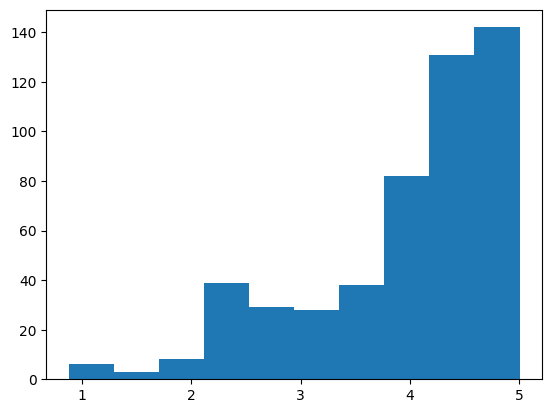

In [70]:
import numpy as np
plt.hist(np.log(mode_mapping.sort_values(by='PRICE_INFORMATION', ascending=False)['PRICE_INFORMATION']));

### Generate new column called `MODE_PRICE_INFORMATION` that will help deal with outliers and NaN values in the usdata table

In [71]:
usdata.columns

Index(['USER_ID', 'COUNTRY', 'DERIVED_GENDER_BY_NAME',
       'CLICKSTREAM_EVENTS_TOTAL', 'FIRST_PURCHASE_AT', 'FIRST_VISIT_AT',
       'LATEST_VISIT_AT', 'LATEST_PURCHASE_AT', 'EVENT_NAME',
       'EVENT_TIMESTAMP', 'ITEM_ID', 'PRICE_INFORMATION', 'AVG_REVIEW_SCORE',
       'STYLE', 'TAXONOMY_STYLE', 'COLOR_NAME', 'PRODUCT_CLASS',
       'PRODUCT_SUBCLASS', 'TEAM', 'FRANCHISE', 'PRODUCT_GROUP'],
      dtype='object')

In [74]:
usdata

,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,EVENT_TIMESTAMP,...,PRICE_INFORMATION,AVG_REVIEW_SCORE,STYLE,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP
0,6c80a69aee886436e29279ea32a8e01c8d6bd9245f06e4...,United States,M,763,2019-12-30T02:13:39Z,2021-11-30T06:48:50.362Z,2023-08-09T02:12:47.304Z,2023-06-23T00:17:33Z,product_viewed,2023-03-19T20:13:09.805Z,...,89.0,3.960000,mens-tree-dashers-1,Tree Dasher,Pukeko (White),Footwear,Shoe,Mens,Dasher,Active
1,aa9eb022ab1bf8dd03f7a08d0bfc7cebee6bbddd20a338...,United States,NaN,341,2019-09-25T13:54:27Z,2021-09-14T11:41:14.862Z,2023-09-08T00:59:06.069Z,2022-12-03T18:38:07Z,product_viewed,2023-09-02T15:44:54.238Z,...,125.0,4.268293,mens-wool-runner-mizzles,Wool Runner Mizzle,Ntrl Blck (Rggd Khk),Footwear,Shoe,Mens,Runner,Lifestyle
2,09c26d7b27b81279453efb2cc8a2743f694cafcdb6c188...,United States,M,126,2023-02-24T14:09:29Z,2023-02-10T16:07:07.678Z,2023-08-21T14:41:36.74Z,2023-03-18T15:46:02Z,product_viewed,2023-03-18T15:37:22.058Z,...,99.0,4.800000,mens-trail-runners-swt,Trail Runner SWT,Mdm Gry (Rggd Khk),Footwear,Shoe,Mens,Trail,Active
3,9976c812700600d29fd5f72e47b0f503ea9f9007e68873...,United States,F,41,2023-06-01T15:25:38Z,2023-06-01T15:22:17.951Z,2023-06-01T15:26:07.661Z,2023-06-01T15:25:38Z,product_viewed,2023-06-01T15:22:26.611Z,...,100.0,4.111111,womens-tree-breezers,Tree Breezer,Navy Night (Dark Navy),Footwear,Shoe,Womens,Breezer,Lifestyle
6,6177b6a7d95e1503f45acedbbf2d9311b064792450364f...,United States,M,479,2022-12-30T12:11:36Z,2022-05-13T16:50:27.423Z,2023-08-30T14:55:31.603Z,2022-12-30T12:11:36Z,product_viewed,2023-03-21T00:02:33.844Z,...,89.0,4.682353,mens-tree-dashers-1,Tree Dasher,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520908,264e79e7113ed8016b31378480983e5e29f8db1468ea4b...,United States,F,335,2020-12-18T03:05:49Z,2021-12-01T16:49:50.251Z,2023-05-15T19:21:02.324Z,2023-08-05T16:48:22Z,cart_viewed,2023-02-04T05:13:12.808Z,...,125.0,4.586207,womens-wool-runner-mizzles,Wool Runner Mizzle,Natural Grey,Footwear,Shoe,Womens,Runner,Lifestyle
1520909,08868051524d2f577d5844707da634d26da6afa0c413a2...,United States,F,466,2023-02-24T00:09:47Z,2023-02-23T23:58:21.453Z,2023-09-05T11:40:31.126Z,2023-07-14T20:00:19Z,order,2023-03-10T03:29:16Z,...,12.8,3.583333,anytime-ankle-sock,Anytime Ankle Sock,Calm Teal,Apparel,Sock,Unisex,Sock,Essentials
1520911,550212b69e2c8fa7e2ff4307e5099ed9a6474405e2c705...,United States,F,32,2017-11-05T00:22:38Z,2023-04-17T01:11:52.943Z,2023-04-26T05:34:20.098Z,2023-04-26T05:34:16Z,order,2023-04-26T05:34:16Z,...,105.0,5.000000,womens-tree-runners,Tree Runner,Wheat (Dark Beige),Footwear,Shoe,Womens,Runner,Lifestyle
1520913,d3cfe92c3885b6aa6e7dc5777a33d3c858d55f7c5e96a6...,United States,NaN,59,2023-01-31T00:14:01Z,2023-01-31T00:02:35.715Z,2023-01-31T03:03:26.97Z,2023-01-31T00:14:01Z,order,2023-01-31T00:14:01Z,...,89.0,4.682353,mens-tree-dashers-1,Tree Dasher,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active


In [76]:
mode_merged = pd.merge(usdata, mode_mapping, on='ITEM_ID', how='left')
mode_merged

,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,EVENT_TIMESTAMP,...,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS_x,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP,STYLE_y,PRODUCT_CLASS_y,CLEANED_PRICE_INFORMATION
0,6c80a69aee886436e29279ea32a8e01c8d6bd9245f06e4...,United States,M,763,2019-12-30T02:13:39Z,2021-11-30T06:48:50.362Z,2023-08-09T02:12:47.304Z,2023-06-23T00:17:33Z,product_viewed,2023-03-19T20:13:09.805Z,...,Tree Dasher,Pukeko (White),Footwear,Shoe,Mens,Dasher,Active,mens-tree-dashers-1,Footwear,89.0
1,aa9eb022ab1bf8dd03f7a08d0bfc7cebee6bbddd20a338...,United States,NaN,341,2019-09-25T13:54:27Z,2021-09-14T11:41:14.862Z,2023-09-08T00:59:06.069Z,2022-12-03T18:38:07Z,product_viewed,2023-09-02T15:44:54.238Z,...,Wool Runner Mizzle,Ntrl Blck (Rggd Khk),Footwear,Shoe,Mens,Runner,Lifestyle,mens-wool-runner-mizzles,Footwear,125.0
2,09c26d7b27b81279453efb2cc8a2743f694cafcdb6c188...,United States,M,126,2023-02-24T14:09:29Z,2023-02-10T16:07:07.678Z,2023-08-21T14:41:36.74Z,2023-03-18T15:46:02Z,product_viewed,2023-03-18T15:37:22.058Z,...,Trail Runner SWT,Mdm Gry (Rggd Khk),Footwear,Shoe,Mens,Trail,Active,mens-trail-runners-swt,Footwear,140.0
3,9976c812700600d29fd5f72e47b0f503ea9f9007e68873...,United States,F,41,2023-06-01T15:25:38Z,2023-06-01T15:22:17.951Z,2023-06-01T15:26:07.661Z,2023-06-01T15:25:38Z,product_viewed,2023-06-01T15:22:26.611Z,...,Tree Breezer,Navy Night (Dark Navy),Footwear,Shoe,Womens,Breezer,Lifestyle,womens-tree-breezers,Footwear,100.0
4,6177b6a7d95e1503f45acedbbf2d9311b064792450364f...,United States,M,479,2022-12-30T12:11:36Z,2022-05-13T16:50:27.423Z,2023-08-30T14:55:31.603Z,2022-12-30T12:11:36Z,product_viewed,2023-03-21T00:02:33.844Z,...,Tree Dasher,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active,mens-tree-dashers-1,Footwear,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315859,264e79e7113ed8016b31378480983e5e29f8db1468ea4b...,United States,F,335,2020-12-18T03:05:49Z,2021-12-01T16:49:50.251Z,2023-05-15T19:21:02.324Z,2023-08-05T16:48:22Z,cart_viewed,2023-02-04T05:13:12.808Z,...,Wool Runner Mizzle,Natural Grey,Footwear,Shoe,Womens,Runner,Lifestyle,womens-wool-runner-mizzles,Footwear,125.0
1315860,08868051524d2f577d5844707da634d26da6afa0c413a2...,United States,F,466,2023-02-24T00:09:47Z,2023-02-23T23:58:21.453Z,2023-09-05T11:40:31.126Z,2023-07-14T20:00:19Z,order,2023-03-10T03:29:16Z,...,Anytime Ankle Sock,Calm Teal,Apparel,Sock,Unisex,Sock,Essentials,anytime-ankle-sock,Apparel,16.0
1315861,550212b69e2c8fa7e2ff4307e5099ed9a6474405e2c705...,United States,F,32,2017-11-05T00:22:38Z,2023-04-17T01:11:52.943Z,2023-04-26T05:34:20.098Z,2023-04-26T05:34:16Z,order,2023-04-26T05:34:16Z,...,Tree Runner,Wheat (Dark Beige),Footwear,Shoe,Womens,Runner,Lifestyle,womens-tree-runners,Footwear,105.0
1315862,d3cfe92c3885b6aa6e7dc5777a33d3c858d55f7c5e96a6...,United States,NaN,59,2023-01-31T00:14:01Z,2023-01-31T00:02:35.715Z,2023-01-31T03:03:26.97Z,2023-01-31T00:14:01Z,order,2023-01-31T00:14:01Z,...,Tree Dasher,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active,mens-tree-dashers-1,Footwear,89.0


#### Remove where `CLEANED_PRICE_INFORMATION` == NaN b/c the item is no longer being sold

In [82]:
mode_merged = mode_merged[mode_merged['CLEANED_PRICE_INFORMATION'].notnull()]
mode_merged

,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,EVENT_TIMESTAMP,...,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS_x,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP,STYLE_y,PRODUCT_CLASS_y,CLEANED_PRICE_INFORMATION
0,6c80a69aee886436e29279ea32a8e01c8d6bd9245f06e4...,United States,M,763,2019-12-30T02:13:39Z,2021-11-30T06:48:50.362Z,2023-08-09T02:12:47.304Z,2023-06-23T00:17:33Z,product_viewed,2023-03-19T20:13:09.805Z,...,Tree Dasher,Pukeko (White),Footwear,Shoe,Mens,Dasher,Active,mens-tree-dashers-1,Footwear,89.0
1,aa9eb022ab1bf8dd03f7a08d0bfc7cebee6bbddd20a338...,United States,NaN,341,2019-09-25T13:54:27Z,2021-09-14T11:41:14.862Z,2023-09-08T00:59:06.069Z,2022-12-03T18:38:07Z,product_viewed,2023-09-02T15:44:54.238Z,...,Wool Runner Mizzle,Ntrl Blck (Rggd Khk),Footwear,Shoe,Mens,Runner,Lifestyle,mens-wool-runner-mizzles,Footwear,125.0
2,09c26d7b27b81279453efb2cc8a2743f694cafcdb6c188...,United States,M,126,2023-02-24T14:09:29Z,2023-02-10T16:07:07.678Z,2023-08-21T14:41:36.74Z,2023-03-18T15:46:02Z,product_viewed,2023-03-18T15:37:22.058Z,...,Trail Runner SWT,Mdm Gry (Rggd Khk),Footwear,Shoe,Mens,Trail,Active,mens-trail-runners-swt,Footwear,140.0
3,9976c812700600d29fd5f72e47b0f503ea9f9007e68873...,United States,F,41,2023-06-01T15:25:38Z,2023-06-01T15:22:17.951Z,2023-06-01T15:26:07.661Z,2023-06-01T15:25:38Z,product_viewed,2023-06-01T15:22:26.611Z,...,Tree Breezer,Navy Night (Dark Navy),Footwear,Shoe,Womens,Breezer,Lifestyle,womens-tree-breezers,Footwear,100.0
4,6177b6a7d95e1503f45acedbbf2d9311b064792450364f...,United States,M,479,2022-12-30T12:11:36Z,2022-05-13T16:50:27.423Z,2023-08-30T14:55:31.603Z,2022-12-30T12:11:36Z,product_viewed,2023-03-21T00:02:33.844Z,...,Tree Dasher,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active,mens-tree-dashers-1,Footwear,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315859,264e79e7113ed8016b31378480983e5e29f8db1468ea4b...,United States,F,335,2020-12-18T03:05:49Z,2021-12-01T16:49:50.251Z,2023-05-15T19:21:02.324Z,2023-08-05T16:48:22Z,cart_viewed,2023-02-04T05:13:12.808Z,...,Wool Runner Mizzle,Natural Grey,Footwear,Shoe,Womens,Runner,Lifestyle,womens-wool-runner-mizzles,Footwear,125.0
1315860,08868051524d2f577d5844707da634d26da6afa0c413a2...,United States,F,466,2023-02-24T00:09:47Z,2023-02-23T23:58:21.453Z,2023-09-05T11:40:31.126Z,2023-07-14T20:00:19Z,order,2023-03-10T03:29:16Z,...,Anytime Ankle Sock,Calm Teal,Apparel,Sock,Unisex,Sock,Essentials,anytime-ankle-sock,Apparel,16.0
1315861,550212b69e2c8fa7e2ff4307e5099ed9a6474405e2c705...,United States,F,32,2017-11-05T00:22:38Z,2023-04-17T01:11:52.943Z,2023-04-26T05:34:20.098Z,2023-04-26T05:34:16Z,order,2023-04-26T05:34:16Z,...,Tree Runner,Wheat (Dark Beige),Footwear,Shoe,Womens,Runner,Lifestyle,womens-tree-runners,Footwear,105.0
1315862,d3cfe92c3885b6aa6e7dc5777a33d3c858d55f7c5e96a6...,United States,NaN,59,2023-01-31T00:14:01Z,2023-01-31T00:02:35.715Z,2023-01-31T03:03:26.97Z,2023-01-31T00:14:01Z,order,2023-01-31T00:14:01Z,...,Tree Dasher,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active,mens-tree-dashers-1,Footwear,89.0


In [98]:
mode_merged[['PRICE_INFORMATION', 'CLEANED_PRICE_INFORMATION']]

,PRICE_INFORMATION,CLEANED_PRICE_INFORMATION
0,89.0,89.0
1,125.0,125.0
2,99.0,140.0
3,100.0,100.0
4,89.0,89.0
...,...,...
1315859,125.0,125.0
1315860,12.8,16.0
1315861,105.0,105.0
1315862,89.0,89.0


In [83]:
mode_merged.isna().sum()

USER_ID                          0
COUNTRY                          0
DERIVED_GENDER_BY_NAME       75233
CLICKSTREAM_EVENTS_TOTAL         0
FIRST_PURCHASE_AT                0
FIRST_VISIT_AT                   0
LATEST_VISIT_AT                  0
LATEST_PURCHASE_AT               0
EVENT_NAME                       0
EVENT_TIMESTAMP                  0
ITEM_ID                          0
PRICE_INFORMATION             2872
AVG_REVIEW_SCORE                 0
STYLE_x                          0
TAXONOMY_STYLE                   0
COLOR_NAME                       0
PRODUCT_CLASS_x                  0
PRODUCT_SUBCLASS                 0
TEAM                             0
FRANCHISE                        0
PRODUCT_GROUP                    0
STYLE_y                          0
PRODUCT_CLASS_y                  0
CLEANED_PRICE_INFORMATION        0
dtype: int64

In [84]:
mode_merged.columns

Index(['USER_ID', 'COUNTRY', 'DERIVED_GENDER_BY_NAME',
       'CLICKSTREAM_EVENTS_TOTAL', 'FIRST_PURCHASE_AT', 'FIRST_VISIT_AT',
       'LATEST_VISIT_AT', 'LATEST_PURCHASE_AT', 'EVENT_NAME',
       'EVENT_TIMESTAMP', 'ITEM_ID', 'PRICE_INFORMATION', 'AVG_REVIEW_SCORE',
       'STYLE_x', 'TAXONOMY_STYLE', 'COLOR_NAME', 'PRODUCT_CLASS_x',
       'PRODUCT_SUBCLASS', 'TEAM', 'FRANCHISE', 'PRODUCT_GROUP', 'STYLE_y',
       'PRODUCT_CLASS_y', 'CLEANED_PRICE_INFORMATION'],
      dtype='object')

In [86]:
mode_merged = mode_merged[['USER_ID', 'COUNTRY', 'DERIVED_GENDER_BY_NAME',
       'CLICKSTREAM_EVENTS_TOTAL', 'FIRST_PURCHASE_AT', 'FIRST_VISIT_AT',
       'LATEST_VISIT_AT', 'LATEST_PURCHASE_AT', 'EVENT_NAME',
       'EVENT_TIMESTAMP', 'ITEM_ID', 'PRICE_INFORMATION', 'AVG_REVIEW_SCORE',
       'STYLE_x', 'TAXONOMY_STYLE', 'COLOR_NAME', 'PRODUCT_CLASS_x', 'PRODUCT_SUBCLASS', 'TEAM', 'FRANCHISE', 'PRODUCT_GROUP', 'CLEANED_PRICE_INFORMATION']]

In [87]:
mask = mode_merged['DERIVED_GENDER_BY_NAME'].isna()

mode_merged.loc[mask, 'DERIVED_GENDER_BY_NAME'] = mode_merged.loc[mask, 'TEAM'].apply(
    lambda x: 'M' if x == 'Mens' else 'F' if x == 'Womens' else 'U' if x == 'Unisex' else None
)

In [88]:
mode_merged[mode_merged['DERIVED_GENDER_BY_NAME'] == 'U']

,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,EVENT_TIMESTAMP,...,AVG_REVIEW_SCORE,STYLE_x,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS_x,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP,CLEANED_PRICE_INFORMATION
33,e9cf6a168e0401f8761ef89835868dc4e377e1c4c875cb...,United States,U,169,2022-12-11T21:07:22Z,2022-12-11T21:03:41.283Z,2023-07-25T17:53:28.217Z,2023-07-25T17:53:23Z,product_viewed,2023-07-25T17:44:32.551Z,...,4.571429,sugar-sliders,Sugar Slider,Blizzard,Footwear,Sandal,Unisex,Warm Seasonal,Lifestyle,24.0
288,df9b0c9b7c799434accf5474d7c3737774ba2cad5ff11f...,United States,U,56,2023-05-19T06:14:42Z,2023-05-19T06:07:21.618Z,2023-05-26T01:22:50.252Z,2023-05-19T06:14:42Z,product_viewed,2023-05-19T06:10:00.259Z,...,3.176471,anytime-ankle-sock,Anytime Ankle Sock,Blizzard,Apparel,Sock,Unisex,Sock,Essentials,16.0
326,ffec4223eebe8db03c560bf00415610383bfaf789cae7e...,United States,U,85,2023-08-05T02:50:18Z,2023-08-05T01:34:16.234Z,2023-08-05T07:19:27.849Z,2023-08-05T02:50:18Z,product_viewed,2023-08-05T02:44:23.159Z,...,4.571429,sugar-sliders,Sugar Slider,Blizzard,Footwear,Sandal,Unisex,Warm Seasonal,Lifestyle,24.0
457,97e3f209b918c741f4ad173f637509a72f3bb0ef6b5cdb...,United States,U,220,2023-07-30T08:12:18Z,2023-07-30T08:10:21.372Z,2023-08-20T20:48:06.419Z,2023-08-20T16:15:16Z,product_viewed,2023-07-30T08:11:29.994Z,...,4.571429,sugar-sliders,Sugar Slider,Blizzard,Footwear,Sandal,Unisex,Warm Seasonal,Lifestyle,24.0
542,156e0d8df79eaa178155266ab745aa85b04d1807d5a832...,United States,U,84,2023-07-25T05:50:52Z,2023-07-25T04:47:54.168Z,2023-07-25T11:30:16.866Z,2023-07-25T05:50:52Z,product_viewed,2023-07-25T05:35:12.687Z,...,3.583333,anytime-ankle-sock,Anytime Ankle Sock,Calm Teal,Apparel,Sock,Unisex,Sock,Essentials,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315688,0c36a30b5fd7bfd7271b7171b29327c8c7d13b8426e90d...,United States,U,195,2023-06-14T21:39:09Z,2023-06-15T04:47:53.918Z,2023-06-16T02:54:22.381Z,2023-06-17T21:12:33Z,order,2023-06-17T21:12:33Z,...,4.566667,sugar-sliders,Sugar Slider,Pure Azure,Footwear,Sandal,Unisex,Warm Seasonal,Lifestyle,24.0
1315747,6e51c8f5f43e6da8a6055b6126ccd642c9bf9e34c710d8...,United States,U,233,2018-09-18T14:58:47Z,2022-07-11T14:13:14.804Z,2023-05-04T17:08:02.532Z,2023-05-04T17:07:58Z,cart_viewed,2023-05-04T16:29:50.463Z,...,3.870968,trino-hiders,Hiders,Ash,Apparel,Sock,Unisex,Sock,Essentials,9.0
1315761,05d06e3ea1ceabb826bfbbaadda89534ff62b22c6b8050...,United States,U,46,2023-05-14T14:04:54Z,2023-05-14T13:58:10.312Z,2023-05-23T15:14:43.418Z,2023-05-23T15:14:40Z,order,2023-05-23T15:14:40Z,...,4.571429,sugar-sliders,Sugar Slider,Blizzard,Footwear,Sandal,Unisex,Warm Seasonal,Lifestyle,24.0
1315811,2485d33a868582ffc85287dbde18d2acdb01c477a8c4ee...,United States,U,1,2021-03-28T17:12:38Z,2022-11-22T15:49:34.283Z,2022-11-22T15:49:34.283Z,2023-03-04T00:01:35Z,order,2023-03-04T00:01:35Z,...,3.500000,trino-hiders,Hiders,Wheat,Apparel,Sock,Unisex,Sock,Essentials,4.0


In [90]:
mode_merged[mode_merged['CLEANED_PRICE_INFORMATION'].isna()]

,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,EVENT_TIMESTAMP,...,AVG_REVIEW_SCORE,STYLE_x,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS_x,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP,CLEANED_PRICE_INFORMATION


#### Checking for any other null values, use `MODE_PRICE_INFO` when running model

In [91]:
mode_merged.isnull().sum()

USER_ID                         0
COUNTRY                         0
DERIVED_GENDER_BY_NAME          0
CLICKSTREAM_EVENTS_TOTAL        0
FIRST_PURCHASE_AT               0
FIRST_VISIT_AT                  0
LATEST_VISIT_AT                 0
LATEST_PURCHASE_AT              0
EVENT_NAME                      0
EVENT_TIMESTAMP                 0
ITEM_ID                         0
PRICE_INFORMATION            2872
AVG_REVIEW_SCORE                0
STYLE_x                         0
TAXONOMY_STYLE                  0
COLOR_NAME                      0
PRODUCT_CLASS_x                 0
PRODUCT_SUBCLASS                0
TEAM                            0
FRANCHISE                       0
PRODUCT_GROUP                   0
CLEANED_PRICE_INFORMATION       0
dtype: int64

In [92]:
mode_merged

,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,EVENT_TIMESTAMP,...,AVG_REVIEW_SCORE,STYLE_x,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS_x,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP,CLEANED_PRICE_INFORMATION
0,6c80a69aee886436e29279ea32a8e01c8d6bd9245f06e4...,United States,M,763,2019-12-30T02:13:39Z,2021-11-30T06:48:50.362Z,2023-08-09T02:12:47.304Z,2023-06-23T00:17:33Z,product_viewed,2023-03-19T20:13:09.805Z,...,3.960000,mens-tree-dashers-1,Tree Dasher,Pukeko (White),Footwear,Shoe,Mens,Dasher,Active,89.0
1,aa9eb022ab1bf8dd03f7a08d0bfc7cebee6bbddd20a338...,United States,M,341,2019-09-25T13:54:27Z,2021-09-14T11:41:14.862Z,2023-09-08T00:59:06.069Z,2022-12-03T18:38:07Z,product_viewed,2023-09-02T15:44:54.238Z,...,4.268293,mens-wool-runner-mizzles,Wool Runner Mizzle,Ntrl Blck (Rggd Khk),Footwear,Shoe,Mens,Runner,Lifestyle,125.0
2,09c26d7b27b81279453efb2cc8a2743f694cafcdb6c188...,United States,M,126,2023-02-24T14:09:29Z,2023-02-10T16:07:07.678Z,2023-08-21T14:41:36.74Z,2023-03-18T15:46:02Z,product_viewed,2023-03-18T15:37:22.058Z,...,4.800000,mens-trail-runners-swt,Trail Runner SWT,Mdm Gry (Rggd Khk),Footwear,Shoe,Mens,Trail,Active,140.0
3,9976c812700600d29fd5f72e47b0f503ea9f9007e68873...,United States,F,41,2023-06-01T15:25:38Z,2023-06-01T15:22:17.951Z,2023-06-01T15:26:07.661Z,2023-06-01T15:25:38Z,product_viewed,2023-06-01T15:22:26.611Z,...,4.111111,womens-tree-breezers,Tree Breezer,Navy Night (Dark Navy),Footwear,Shoe,Womens,Breezer,Lifestyle,100.0
4,6177b6a7d95e1503f45acedbbf2d9311b064792450364f...,United States,M,479,2022-12-30T12:11:36Z,2022-05-13T16:50:27.423Z,2023-08-30T14:55:31.603Z,2022-12-30T12:11:36Z,product_viewed,2023-03-21T00:02:33.844Z,...,4.682353,mens-tree-dashers-1,Tree Dasher,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315859,264e79e7113ed8016b31378480983e5e29f8db1468ea4b...,United States,F,335,2020-12-18T03:05:49Z,2021-12-01T16:49:50.251Z,2023-05-15T19:21:02.324Z,2023-08-05T16:48:22Z,cart_viewed,2023-02-04T05:13:12.808Z,...,4.586207,womens-wool-runner-mizzles,Wool Runner Mizzle,Natural Grey,Footwear,Shoe,Womens,Runner,Lifestyle,125.0
1315860,08868051524d2f577d5844707da634d26da6afa0c413a2...,United States,F,466,2023-02-24T00:09:47Z,2023-02-23T23:58:21.453Z,2023-09-05T11:40:31.126Z,2023-07-14T20:00:19Z,order,2023-03-10T03:29:16Z,...,3.583333,anytime-ankle-sock,Anytime Ankle Sock,Calm Teal,Apparel,Sock,Unisex,Sock,Essentials,16.0
1315861,550212b69e2c8fa7e2ff4307e5099ed9a6474405e2c705...,United States,F,32,2017-11-05T00:22:38Z,2023-04-17T01:11:52.943Z,2023-04-26T05:34:20.098Z,2023-04-26T05:34:16Z,order,2023-04-26T05:34:16Z,...,5.000000,womens-tree-runners,Tree Runner,Wheat (Dark Beige),Footwear,Shoe,Womens,Runner,Lifestyle,105.0
1315862,d3cfe92c3885b6aa6e7dc5777a33d3c858d55f7c5e96a6...,United States,M,59,2023-01-31T00:14:01Z,2023-01-31T00:02:35.715Z,2023-01-31T03:03:26.97Z,2023-01-31T00:14:01Z,order,2023-01-31T00:14:01Z,...,4.682353,mens-tree-dashers-1,Tree Dasher,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active,89.0


#### One Hot Encode gender labels

In [93]:
enc = OneHotEncoder()
enc_data = pd.DataFrame(enc.fit_transform( 
    mode_merged[['DERIVED_GENDER_BY_NAME']]).toarray()) 
enc_data = enc_data.rename(columns = {0 : 'FEMALE', 1 : 'MALE', 2 : 'UNISEX'})
enc_data

,FEMALE,MALE,UNISEX
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
1315847,1.0,0.0,0.0
1315848,1.0,0.0,0.0
1315849,1.0,0.0,0.0
1315850,0.0,1.0,0.0


In [95]:
mode_merged = mode_merged.drop('DERIVED_GENDER_BY_NAME', axis=1)

In [96]:
ohe_gender_merged = mode_merged.join(enc_data)
ohe_gender_merged

,USER_ID,COUNTRY,CLICKSTREAM_EVENTS_TOTAL,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,EVENT_TIMESTAMP,ITEM_ID,...,COLOR_NAME,PRODUCT_CLASS_x,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP,CLEANED_PRICE_INFORMATION,FEMALE,MALE,UNISEX
0,6c80a69aee886436e29279ea32a8e01c8d6bd9245f06e4...,United States,763,2019-12-30T02:13:39Z,2021-11-30T06:48:50.362Z,2023-08-09T02:12:47.304Z,2023-06-23T00:17:33Z,product_viewed,2023-03-19T20:13:09.805Z,color-mens-tree-dashers-pukeko,...,Pukeko (White),Footwear,Shoe,Mens,Dasher,Active,89.0,0.0,1.0,0.0
1,aa9eb022ab1bf8dd03f7a08d0bfc7cebee6bbddd20a338...,United States,341,2019-09-25T13:54:27Z,2021-09-14T11:41:14.862Z,2023-09-08T00:59:06.069Z,2022-12-03T18:38:07Z,product_viewed,2023-09-02T15:44:54.238Z,color-mens-wool-runner-mizzles-natural-black-r...,...,Ntrl Blck (Rggd Khk),Footwear,Shoe,Mens,Runner,Lifestyle,125.0,0.0,1.0,0.0
2,09c26d7b27b81279453efb2cc8a2743f694cafcdb6c188...,United States,126,2023-02-24T14:09:29Z,2023-02-10T16:07:07.678Z,2023-08-21T14:41:36.74Z,2023-03-18T15:46:02Z,product_viewed,2023-03-18T15:37:22.058Z,color-mens-trail-runners-swt-medium-grey-rugge...,...,Mdm Gry (Rggd Khk),Footwear,Shoe,Mens,Trail,Active,140.0,0.0,1.0,0.0
3,9976c812700600d29fd5f72e47b0f503ea9f9007e68873...,United States,41,2023-06-01T15:25:38Z,2023-06-01T15:22:17.951Z,2023-06-01T15:26:07.661Z,2023-06-01T15:25:38Z,product_viewed,2023-06-01T15:22:26.611Z,color-womens-tree-breezers-navy-night,...,Navy Night (Dark Navy),Footwear,Shoe,Womens,Breezer,Lifestyle,100.0,1.0,0.0,0.0
4,6177b6a7d95e1503f45acedbbf2d9311b064792450364f...,United States,479,2022-12-30T12:11:36Z,2022-05-13T16:50:27.423Z,2023-08-30T14:55:31.603Z,2022-12-30T12:11:36Z,product_viewed,2023-03-21T00:02:33.844Z,color-mens-tree-dashers-geyser,...,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active,89.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315859,264e79e7113ed8016b31378480983e5e29f8db1468ea4b...,United States,335,2020-12-18T03:05:49Z,2021-12-01T16:49:50.251Z,2023-05-15T19:21:02.324Z,2023-08-05T16:48:22Z,cart_viewed,2023-02-04T05:13:12.808Z,color-womens-wool-runner-mizzles,...,Natural Grey,Footwear,Shoe,Womens,Runner,Lifestyle,125.0,NaN,NaN,NaN
1315860,08868051524d2f577d5844707da634d26da6afa0c413a2...,United States,466,2023-02-24T00:09:47Z,2023-02-23T23:58:21.453Z,2023-09-05T11:40:31.126Z,2023-07-14T20:00:19Z,order,2023-03-10T03:29:16Z,color-anytime-ankle-sock-calm-teal,...,Calm Teal,Apparel,Sock,Unisex,Sock,Essentials,16.0,NaN,NaN,NaN
1315861,550212b69e2c8fa7e2ff4307e5099ed9a6474405e2c705...,United States,32,2017-11-05T00:22:38Z,2023-04-17T01:11:52.943Z,2023-04-26T05:34:20.098Z,2023-04-26T05:34:16Z,order,2023-04-26T05:34:16Z,color-womens-tree-runners-wheat,...,Wheat (Dark Beige),Footwear,Shoe,Womens,Runner,Lifestyle,105.0,NaN,NaN,NaN
1315862,d3cfe92c3885b6aa6e7dc5777a33d3c858d55f7c5e96a6...,United States,59,2023-01-31T00:14:01Z,2023-01-31T00:02:35.715Z,2023-01-31T03:03:26.97Z,2023-01-31T00:14:01Z,order,2023-01-31T00:14:01Z,color-mens-tree-dashers-geyser,...,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active,89.0,NaN,NaN,NaN


_____

## OUTDATED DO NOT RUN THIS

In [11]:
usdata['PRODUCT_CLASS'].unique()

array(['Footwear', 'Apparel', 'Accessories'], dtype=object)

In [9]:
usdata.groupby('EVENT_NAME')['USER_ID'].count()

EVENT_NAME
cart_viewed         107657
exchange              1151
order                50224
product_added        61794
product_removed      38492
product_viewed     1071359
return                7771
Name: USER_ID, dtype: int64

In [10]:
usdata.groupby('USER_ID')['CLICKSTREAM_EVENTS_TOTAL'].count()

USER_ID
000020716b48cd6631238cb02ad9d3dbe7356788370dd09ac828b08f475c5441    32
000032e76e46b92d24125de9bbfc057c4cdc142226ad1ff24963af4436ea1600     2
0000d72c11da8d802669129c7e932f31f12ee984cd1407aa67d8a17d85d4f4a2     7
0000e497ac4466a3ab379553b1e1aef39acfbef0b4d322253184b2ae5f97c32b     3
00010774413211beb5f5bd5b2108100ef1847737060b8ac2398f952247caea42    24
                                                                    ..
fffd2ae04e0eb5d96a880d4685ae17371da4b2a3fc419f75c2bef70e1268e515    16
fffd5533e6c478575f7849512827718e886638d39c6889a471bff8e3cfe12b2f     1
fffd77572a2eb75231ef9897ffe58d4214aa130e654b28a1b1a6998d945c4003     1
fffe3902f43e99d1d5cdbd98a0c0aa29e2fd585f301fada0dbaf92f577fad975    15
ffff778a3687002b739becbed38c927cd198a12bfc09dd48554040056010fc0a     2
Name: CLICKSTREAM_EVENTS_TOTAL, Length: 93157, dtype: int64

In [11]:
user_item_interaction = usdata.groupby(['USER_ID', 'ITEM_ID'])['EVENT_NAME'].count().reset_index()
user_item_interaction


,USER_ID,ITEM_ID,EVENT_NAME
0,000020716b48cd6631238cb02ad9d3dbe7356788370dd0...,color-mens-tree-dashers,1
1,000020716b48cd6631238cb02ad9d3dbe7356788370dd0...,color-mens-tree-dashers-blizzard,1
2,000020716b48cd6631238cb02ad9d3dbe7356788370dd0...,color-mens-tree-dashers-crest,1
3,000020716b48cd6631238cb02ad9d3dbe7356788370dd0...,color-mens-tree-dashers-cyclone,1
4,000020716b48cd6631238cb02ad9d3dbe7356788370dd0...,color-mens-tree-dashers-erupt,1
...,...,...,...
467227,fffd77572a2eb75231ef9897ffe58d4214aa130e654b28...,color-mens-tree-runners-jet-black-black,1
467228,fffe3902f43e99d1d5cdbd98a0c0aa29e2fd585f301fad...,color-mens-wool-runner-up-mizzles,14
467229,fffe3902f43e99d1d5cdbd98a0c0aa29e2fd585f301fad...,color-mens-wool-runner-up-mizzles-natural-blac...,1
467230,ffff778a3687002b739becbed38c927cd198a12bfc09dd...,color-mens-tree-loungers-natural-black-blizzard,1


## Looking into Orders Only

In [31]:
ordered_items = usdata[usdata['EVENT_NAME'] == 'order'][['USER_ID', 'EVENT_NAME', 'STYLE']]
ordered_items

,USER_ID,EVENT_NAME,STYLE
15679,aa91d8a4c866014c4d89c5fcd994eb9c8c4572fb2bdd29...,order,womens-tree-breezers
15708,e9e16a353dde36b41910cb20916fc7a9ffec3500aa6fcd...,order,womens-wool-runners
15709,ec43cd91bda58410e1c2bb725ae8857423416ccc8d6b80...,order,womens-tree-breezers
23689,6888be99b3c4994bc68a82c7ee5320fdcfcba5a41865ee...,order,mens-tree-dasher-relay
23707,b32a81bbd2da625ecccd48ba71d9f2dd528c11ca64aca5...,order,sugar-sliders
...,...,...,...
1520903,6c7d1582fc400d9112013930a4edd167dfde8918ee401c...,order,anytime-ankle-sock
1520909,08868051524d2f577d5844707da634d26da6afa0c413a2...,order,anytime-ankle-sock
1520911,550212b69e2c8fa7e2ff4307e5099ed9a6474405e2c705...,order,womens-tree-runners
1520913,d3cfe92c3885b6aa6e7dc5777a33d3c858d55f7c5e96a6...,order,mens-tree-dashers-1


In [32]:
ordered_items_count = ordered_items.groupby('STYLE')[['USER_ID']].count()
ordered_items_count = ordered_items_count.sort_values(by = 'USER_ID', ascending=False).head(5)

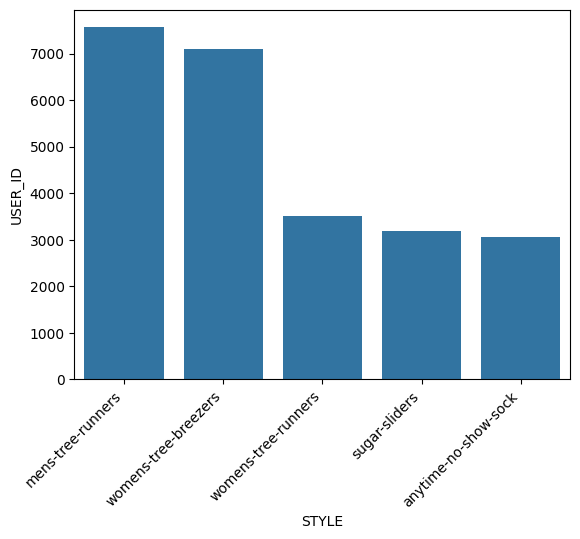

In [33]:
sns.barplot(ordered_items_count, x='STYLE', y='USER_ID')
plt.xticks(rotation=45, ha="right");

In [15]:
prod_interactions = usdata.groupby('STYLE')[['STYLE']].count().rename(columns = {'STYLE' : 'count'})
prod_interactions.sort_values(by='count', ascending=False)

,count
STYLE,
womens-tree-breezers,241077
mens-wool-runners,106856
mens-tree-runners,100886
sugar-sliders,89159
womens-wool-runners,88298
...,...
womens-wool-jumper,1
womens-camp-short,1
mens-wool-jumper,1


In [16]:
ordered_items.merge(prod_interactions, on='STYLE', how='left').sort_values(by= 'count', ascending=False)

,USER_ID,EVENT_NAME,STYLE,count
0,aa91d8a4c866014c4d89c5fcd994eb9c8c4572fb2bdd29...,order,womens-tree-breezers,241077.0
37638,bcc94b8b6ec9f61e0f7d0c553309b34f117c522dbc2051...,order,womens-tree-breezers,241077.0
25028,615deb16d0f5cd621295deb4177aaa60dc887d5a74f55d...,order,womens-tree-breezers,241077.0
25027,157073980df59fc4cefc698fa61e525dca1b6bc0c7145f...,order,womens-tree-breezers,241077.0
25020,ab89ed072808139f61d24629c8aeecc127a631af3021ac...,order,womens-tree-breezers,241077.0
...,...,...,...,...
44981,abb258e9353b73f1f2efa82c6735c537722c1df708611f...,order,NaN,NaN
45393,3d569a8b576a0e3d15d4351cea3574fdb2acf27dedb507...,order,NaN,NaN
46574,469e90b321840193e7602e30b8cfc94bd5faf20a0fab2e...,order,NaN,NaN
48946,bac9e6b996e1c2771a0cdb9aa6310f3ee9074005bc3bc1...,order,NaN,NaN


In [17]:
def quantify_target_variable(row):
    if row == 'order':
        return 1
    else:
        return 0
    
usdata['TARGET'] = usdata['EVENT_NAME'].apply(quantify_target_variable)
usdata

/var/folders/9p/yr0zjmp51xb08j2kgckf5t780000gn/T/ipykernel_1183/4236085599.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usdata['TARGET'] = usdata['EVENT_NAME'].apply(quantify_target_variable)


,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,CLICKSTREAM_EVENTS_TOTAL.1,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,...,AVG_REVIEW_SCORE,STYLE,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP,TARGET
0,6c80a69aee886436e29279ea32a8e01c8d6bd9245f06e4...,United States,M,763,763,2019-12-30T02:13:39Z,2021-11-30T06:48:50.362Z,2023-08-09T02:12:47.304Z,2023-06-23T00:17:33Z,product_viewed,...,3.960000,mens-tree-dashers-1,Tree Dasher,Pukeko (White),Footwear,Shoe,Mens,Dasher,Active,0
1,aa9eb022ab1bf8dd03f7a08d0bfc7cebee6bbddd20a338...,United States,NaN,341,341,2019-09-25T13:54:27Z,2021-09-14T11:41:14.862Z,2023-09-08T00:59:06.069Z,2022-12-03T18:38:07Z,product_viewed,...,4.268293,mens-wool-runner-mizzles,Wool Runner Mizzle,Ntrl Blck (Rggd Khk),Footwear,Shoe,Mens,Runner,Lifestyle,0
2,09c26d7b27b81279453efb2cc8a2743f694cafcdb6c188...,United States,M,126,126,2023-02-24T14:09:29Z,2023-02-10T16:07:07.678Z,2023-08-21T14:41:36.74Z,2023-03-18T15:46:02Z,product_viewed,...,4.800000,mens-trail-runners-swt,Trail Runner SWT,Mdm Gry (Rggd Khk),Footwear,Shoe,Mens,Trail,Active,0
3,9976c812700600d29fd5f72e47b0f503ea9f9007e68873...,United States,F,41,41,2023-06-01T15:25:38Z,2023-06-01T15:22:17.951Z,2023-06-01T15:26:07.661Z,2023-06-01T15:25:38Z,product_viewed,...,4.111111,womens-tree-breezers,Tree Breezer,Navy Night (Dark Navy),Footwear,Shoe,Womens,Breezer,Lifestyle,0
6,6177b6a7d95e1503f45acedbbf2d9311b064792450364f...,United States,M,479,479,2022-12-30T12:11:36Z,2022-05-13T16:50:27.423Z,2023-08-30T14:55:31.603Z,2022-12-30T12:11:36Z,product_viewed,...,4.682353,mens-tree-dashers-1,Tree Dasher,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520910,c9cbb7af7adfd20fddc3f399823e7fcdc0d2ffb8edbed4...,United States,F,826,826,2019-05-27T16:54:05Z,2021-10-17T19:34:37.49Z,2023-09-09T18:25:57.066Z,2023-09-04T13:15:50Z,return,...,4.200000,womens-tree-dasher-relay,Tree Dasher Relay,Natural Black (Buoyant Mint),Footwear,Slip-On,Womens,Dasher,Active,0
1520911,550212b69e2c8fa7e2ff4307e5099ed9a6474405e2c705...,United States,F,32,32,2017-11-05T00:22:38Z,2023-04-17T01:11:52.943Z,2023-04-26T05:34:20.098Z,2023-04-26T05:34:16Z,order,...,5.000000,womens-tree-runners,Tree Runner,Wheat (Dark Beige),Footwear,Shoe,Womens,Runner,Lifestyle,1
1520912,464903c103bfabc8c3e1b5866d9f62ceef8edf8f7d3b78...,United States,NaN,98,98,2023-03-12T23:02:49Z,2023-03-10T15:17:41.833Z,2023-03-17T15:47:37.688Z,2023-03-27T19:52:48Z,return,...,4.190000,mens-wool-runner-mizzles,Wool Runner Mizzle,Natural Grey,Footwear,Shoe,Mens,Runner,Lifestyle,0
1520913,d3cfe92c3885b6aa6e7dc5777a33d3c858d55f7c5e96a6...,United States,NaN,59,59,2023-01-31T00:14:01Z,2023-01-31T00:02:35.715Z,2023-01-31T03:03:26.97Z,2023-01-31T00:14:01Z,order,...,4.682353,mens-tree-dashers-1,Tree Dasher,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active,1


In [34]:
columns_to_keep = ['CLICKSTREAM_EVENTS_TOTAL', 'AVG_REVIEW_SCORE', 'PRICE_INFORMATION', 'TARGET']
filtered_data = usdata[columns_to_keep]

# Calculate the correlation matrix
correlation_matrix = filtered_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')


KeyError: "['TARGET'] not in index"

In [19]:
style_user_count = usdata.groupby(['STYLE', 'USER_ID'])[['STYLE']].count().rename(columns = {'STYLE' : 'count'})
style_user_count

count
STYLE               USER_ID                                                  
anytime-ankle-sock  000032e76e46b92d24125de9bbfc057c4cdc142226ad1ff...      2
                    0007f23c5fab60f5061bdca93da066e6b4d1ff21aedc5e7...      4
                    000d67598fe0fda3c26c57c524569c8fb9eae73e02742e5...     17
                    003bb1bf5dd06578c649eadb792d77ae4987ed71495d0d9...      2
                    004596e25e5be5d106e758b535ab06a04219302ad2943ae...      1
...                                                                       ...
womens-wool-runners fff2db82b7475903bfcf9c526c8c442e425539dfbbedbb1...      9
                    fff36cee27d4de751e98966f3a356703a53d65105214290...     26
                    fff40848705c05dee5c24ff7974d6e0c66bb25973e54c82...      7
                    fffa66c57dfc27e673dc102c8514c446b1f86d06a863e49...      8
                    fffbc53c41cd2df7ac5754443ab63b8a1f20790c5450632...     19

[218265 rows x 1 columns]